In [22]:
# 导入程序所需要的程序包

#抓取网页内容用的程序包
import json
import requests

#PyTorch用的包
import torch
import torch.nn as nn
import torch.optim
#from torch.autograd import Variable

# 自然语言处理相关的包
import re #正则表达式的包
import jieba #结巴分词包
from collections import Counter #搜集器，可以让统计词频更简单，统计元素出现的个数

#绘图、计算用的程序包
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
# 从京东上抓取数据评论
# # 在指定的url处获得评论
# def get_comments(url):
#     comments = []
#     # 打开指定页面
#     resp = requests.get(url)
#     resp.encoding = 'gbk'
    
#     #如果200秒没有打开则失败
#     if resp.status_code != 200:
#         return []
    
#     #获得内容
#     content = resp.text
#     if content:
#         #获得（）括号中的内容
#         ind = content.find('(')
#         s1 = content[ind+1:-2]
#         try:
#             #尝试利用jason接口来读取内容，并做jason的解析
#             js = json.loads(s1)
#             #提取出comments字段的内容
#             comment_infos = js['comments']
#         except:
#             print('error')
#             return([])
        
#         #对每一条评论进行内容部分的抽取
#         for comment_info in comment_infos:
#             comment_content = comment_info['content']
#             str1 = comment_content + '\n'
#             comments.append(str1)
#     return comments

# good_comments = []

# #评论抓取的来源地址，其中参数包括：
# #productId为商品的id，score为评分，page为对应的评论翻页的页码，pageSize为总页数
# #这里，我们设定score＝3表示好的评分。
# good_comment_url_templates = [
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv8914&productId=10359162198&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv73&productId=10968941641&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv4653&productId=10335204102&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv1&productId=1269194114&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv2777&productId=1409704820&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv174&productId=10103790891&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv9447&productId=1708318938&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv111&productId=10849803616&score=3&sortType=5&page={}&pageSize=10&isShadowSku=0'
# ]

# # 对上述网址进行循环，并模拟翻页100次
# j=0
# for good_comment_url_template in good_comment_url_templates:
#     for i in range(100):
#         url = good_comment_url_template.format(i)
#         good_comments += get_comments(url)
#         print('第{}条纪录，总文本长度{}'.format(j, len(good_comments)))
#         j += 1
# #将结果存储到good.txt文件中
# fw = open('data/good.txt', 'w')
# fw.writelines(good_comments)
# # 负向评论如法炮制
# bad_comments = []
# bad_comment_url_templates = [
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv8914&productId=10359162198&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv73&productId=10968941641&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'http://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv4653&productId=10335204102&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv1&productId=1269194114&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv2777&productId=1409704820&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv174&productId=10103790891&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv9447&productId=1708318938&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0',
#     'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv111&productId=10849803616&score=1&sortType=5&page={}&pageSize=10&isShadowSku=0'
# ]

# j = 0
# for bad_comment_url_template in bad_comment_url_templates:
#     for i in range(100):
#         url = bad_comment_url_template.format(i)
#         bad_comments += get_comments(url)
#         print('第{}条纪录，总文本长度{}'.format(j, len(bad_comments)))
#         j += 1

# fw = open('data/bad.txt', 'w')
# fw.writelines(bad_comments)

In [24]:
# 数据来源文件
good_file = 'data/good.txt'
bad_file  = 'data/bad.txt'

# 将文本中的标点符号过滤掉
def filter_punc(sentence):
    sentence = re.sub("[\s+\.\!\/_,$%^*(+\"\'“”《》?“]+|[+——！，。？、~@#￥%……&*（）：]+", "", sentence)  
    return(sentence)

#扫描所有的文本，分词、建立词典，分出正向还是负向的评论，is_filter可以过滤是否筛选掉标点符号
def Prepare_data(good_file, bad_file, is_filter = True):
    all_words = [] #存储所有的单词
    pos_sentences = [] #存储正向的评论
    neg_sentences = [] #存储负向的评论
    with open(good_file, 'r',encoding = 'UTF-8') as fr:
        for idx, line in enumerate(fr):
            if is_filter:
                #过滤标点符号
                line = filter_punc(line)
            #分词,将句子line分成多个分词，形成1个分词list
            words = jieba.lcut(line)
#             print(line,words)
            if len(words) > 0:
                all_words += words
                pos_sentences.append(words)
    print('{0} 包含 {1} 行, {2} 个词.'.format(good_file, idx+1, len(all_words)))

    count = len(all_words)
    with open(bad_file,'r',encoding = 'UTF-8') as fr:
        for idx, line in enumerate(fr):
            if is_filter:
                line = filter_punc(line)
            words = jieba.lcut(line)
            if len(words) > 0:
#                 +=list去掉括号再加入
                all_words += words
#               append不去掉括号把整个list加入    
                neg_sentences.append(words)
    print('{0} 包含 {1} 行, {2} 个词.'.format(bad_file, idx+1, len(all_words)-count))

    #建立词典，diction的每一项为{w:[id, 单词出现次数]}
    diction = {}
    cnt = Counter(all_words)
    for word, freq in cnt.items():
        #第一项为词的标号，第二项为词的出现次数
        diction[word] = [len(diction), freq]
    print('字典大小：{}'.format(len(diction)))
    return(pos_sentences, neg_sentences, diction)

#根据单词返还单词的编码
def word2index(word, diction):
    if word in diction:
        value = diction[word][0]
    else:
        value = -1
    return(value)

#根据编码获得单词
def index2word(index, diction):
    for w,v in diction.items():
        if v[0] == index:
            return(w)
    return(None)

pos_sentences, neg_sentences, diction = Prepare_data(good_file, bad_file, True)
st = sorted([(v[1], w) for w, v in diction.items()])
st

data/good.txt 包含 8089 行, 100839 个词.
data/bad.txt 包含 5076 行, 56070 个词.
字典大小：7135


[(1, '---'),
 (1, '------'),
 (1, '000000000'),
 (1, '0000000000000000'),
 (1, '00000000000000000'),
 (1, '0000000000000000000000'),
 (1, '000000000000000000000000000'),
 (1, '00000000000000000000000000000000000000000000000'),
 (1, '1006'),
 (1, '111'),
 (1, '1111111'),
 (1, '11111111111'),
 (1, '11111111111111'),
 (1, '111111111111111111111111'),
 (1, '11111111111111111111111111111'),
 (1, '111111111111111111111111111111111'),
 (1, '1111111111111111111111111111111111111111111'),
 (1, '115'),
 (1, '122'),
 (1, '12315'),
 (1, '123456'),
 (1, '1255888'),
 (1, '128'),
 (1, '130'),
 (1, '136'),
 (1, '138'),
 (1, '15548'),
 (1, '158105'),
 (1, '160'),
 (1, '16067cm'),
 (1, '165140'),
 (1, '165cm'),
 (1, '166cm68kgxl'),
 (1, '16860'),
 (1, '170CM55'),
 (1, '170M'),
 (1, '170cm75kg'),
 (1, '171819202122'),
 (1, '172'),
 (1, '172153'),
 (1, '175cm'),
 (1, '1805'),
 (1, '180xxl'),
 (1, '183'),
 (1, '185'),
 (1, '1852XL'),
 (1, '185XXL'),
 (1, '185mm'),
 (1, '200000000'),
 (1, '20161218'),
 (1, 

In [25]:
# 输入一个句子和相应的词典，得到这个句子的向量化表示
# 向量的尺寸为词典中词汇的个数，i位置上面的数值为第i个单词在sentence中出现的频率
def sentence2vec(sentence, dictionary):
    #vector是字典中所有分词的向量
    vector = np.zeros(len(dictionary))
    for l in sentence:
        vector[l] += 1
    #vector向量元素和为1
    return(1.0 * vector / len(sentence))

# 遍历所有句子，将每一个词映射成编码
dataset = [] #数据集(存放所有句子的编码)
labels = [] #标签
sentences = [] #原始句子，调试用
# 处理正向评论
for sentence in pos_sentences:
    new_sentence = []
    for l in sentence:
        if l in diction:
            #根据分词得到编码，并形成分词索引形成的列表（一个句子）
            new_sentence.append(word2index(l, diction))
    #把所有的分词索引所形成的列表（一个句子）转换成关于字典的向量
    dataset.append(sentence2vec(new_sentence, diction))
    labels.append(0) #正标签为0
    sentences.append(sentence)

# 处理负向评论
for sentence in neg_sentences:
    new_sentence = []
    for l in sentence:
        if l in diction:
            new_sentence.append(word2index(l, diction))
    dataset.append(sentence2vec(new_sentence, diction))
    labels.append(1) #负标签为1
    sentences.append(sentence)

#打乱所有的数据顺序，形成数据集
# indices为所有数据下标的一个全排列
# permutation随机排列一个数组
indices = np.random.permutation(len(dataset))

#重新根据打乱的下标生成数据集dataset，标签集labels，以及对应的原始句子sentences
dataset = [dataset[i] for i in indices]
labels = [labels[i] for i in indices]
sentences = [sentences[i] for i in indices]

#对整个数据集进行划分，分为：训练集、校准集和测试集，其中校准和测试集合的长度都是整个数据集的10分之一
test_size = len(dataset) // 10
# 训练集
train_data = dataset[2 * test_size :]
train_label = labels[2 * test_size :]

# 校准集
valid_data = dataset[: test_size]
valid_label = labels[: test_size]

# 测试集
test_data = dataset[test_size : 2 * test_size]
test_label = labels[test_size : 2 * test_size]

In [26]:
# 一个简单的前馈神经网络，三层，第一层线性层，加一个非线性ReLU，第二层线性层，中间有10个隐含层神经元

# 输入维度为词典的大小：每一段评论的词袋模型
model = nn.Sequential(
    nn.Linear(len(diction), 10),
    nn.ReLU(),
    nn.Linear(10, 2),
    nn.LogSoftmax(dim=1),
)

def rightness(predictions, labels):
    """计算预测错误率的函数，其中predictions是模型给出的一组预测结果，
    batch_size行num_classes列的矩阵，labels是数据之中的正确答案"""
    # 对于任意一行（一个样本）的输出值的第1个维度，求最大，得到每一行的最大元素的下标
    #[0]返回的是所有行中最大的列的值（返回的是值）
    #[1]返回的是所有行中最大的列的索引（返回的是索引）
    pred = torch.max(predictions.data, 1)[1] 
     #将下标与labels中包含的类别进行比较，并累计得到比较正确的数量
    rights = pred.eq(labels.data.view_as(pred)).sum()
    #返回正确的数量和这一次一共比较了多少元素
    return rights, len(labels) 

In [27]:
# 损失函数为交叉熵
cost = torch.nn.NLLLoss()
# 优化算法为Adam，可以自动调节学习率
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
records = []

#循环10个Epoch
losses = []
for epoch in range(10):
    for i, data in enumerate(zip(train_data, train_label)):
        x, y = data
        
        # 需要将输入的数据进行适当的变形，主要是要多出一个batch_size的维度，也即第一个为1的维度
        x = torch.tensor(x, requires_grad = True, dtype = torch.float).view(1,-1)
        # x的尺寸：batch_size=1, len_dictionary
        # 标签也要加一层外衣以变成1*1的张量
        y = torch.tensor(np.array([y]), dtype = torch.long)
        # y的尺寸：batch_size=1, 1
        
        # 清空梯度
        optimizer.zero_grad()
        # 模型预测
        predict = model(x)
        # 计算损失函数
        loss = cost(predict, y)
        # 将损失函数数值加入到列表中
        losses.append(loss.data.numpy())
        # 开始进行梯度反传
        loss.backward()
        # 开始对参数进行一步优化
        optimizer.step()
        
        # 每隔3000步，跑一下校验数据集的数据，输出临时结果
        if i % 3000 == 0:
            val_losses = []
            rights = []
            # 在所有校验数据集上实验
            #j是标号，val是(valid_data,valid_label)的组合
            for j, val in enumerate(zip(valid_data, valid_label)):
                x, y = val
                # x展开成1行多列
                x = torch.tensor(x, requires_grad = True, dtype = torch.float).view(1,-1)
                y = torch.tensor(np.array([y]), dtype = torch.long)
                predict = model(x)
                # 调用rightness函数计算准确度
                right = rightness(predict, y)
                rights.append(right)
                loss = cost(predict, y)
                val_losses.append(loss.data.numpy())
                
            # 将校验集合上面的平均准确度计算出来
            right_ratio = 1.0 * np.sum([i[0] for i in rights]) / np.sum([i[1] for i in rights])
            print('第{}轮，训练损失：{:.2f}, 校验损失：{:.2f}, 校验准确率: {:.2f}'.format(epoch, np.mean(losses),
                                                                        np.mean(val_losses), right_ratio))
            records.append([np.mean(losses), np.mean(val_losses), right_ratio])
            

第0轮，训练损失：0.66, 校验损失：0.68, 校验准确率: 0.63
第0轮，训练损失：0.35, 校验损失：0.34, 校验准确率: 0.89
第0轮，训练损失：0.32, 校验损失：0.30, 校验准确率: 0.90
第0轮，训练损失：0.30, 校验损失：0.31, 校验准确率: 0.89
第1轮，训练损失：0.30, 校验损失：0.30, 校验准确率: 0.90
第1轮，训练损失：0.29, 校验损失：0.32, 校验准确率: 0.89
第1轮，训练损失：0.28, 校验损失：0.30, 校验准确率: 0.91
第1轮，训练损失：0.27, 校验损失：0.31, 校验准确率: 0.90
第2轮，训练损失：0.27, 校验损失：0.30, 校验准确率: 0.90
第2轮，训练损失：0.26, 校验损失：0.32, 校验准确率: 0.90
第2轮，训练损失：0.25, 校验损失：0.30, 校验准确率: 0.91
第2轮，训练损失：0.25, 校验损失：0.32, 校验准确率: 0.90
第3轮，训练损失：0.25, 校验损失：0.30, 校验准确率: 0.90
第3轮，训练损失：0.25, 校验损失：0.32, 校验准确率: 0.90
第3轮，训练损失：0.24, 校验损失：0.30, 校验准确率: 0.90
第3轮，训练损失：0.24, 校验损失：0.32, 校验准确率: 0.90
第4轮，训练损失：0.24, 校验损失：0.30, 校验准确率: 0.90
第4轮，训练损失：0.23, 校验损失：0.33, 校验准确率: 0.90
第4轮，训练损失：0.23, 校验损失：0.31, 校验准确率: 0.90
第4轮，训练损失：0.23, 校验损失：0.33, 校验准确率: 0.90
第5轮，训练损失：0.23, 校验损失：0.31, 校验准确率: 0.89
第5轮，训练损失：0.23, 校验损失：0.33, 校验准确率: 0.90
第5轮，训练损失：0.22, 校验损失：0.32, 校验准确率: 0.90
第5轮，训练损失：0.22, 校验损失：0.33, 校验准确率: 0.90
第6轮，训练损失：0.22, 校验损失：0.31, 校验准确率: 0.90
第6轮，训练损失：0.22, 校验损失：0.33, 校验准确率: 0.89
第6轮，训练损失：0.2

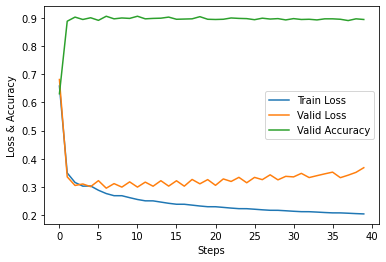

In [28]:
# 绘制误差曲线
a = [i[0] for i in records]
b = [i[1] for i in records]
c = [i[2] for i in records]
plt.plot(a, label = 'Train Loss')
plt.plot(b, label = 'Valid Loss')
plt.plot(c, label = 'Valid Accuracy')
plt.xlabel('Steps')
plt.ylabel('Loss & Accuracy')
plt.legend()

In [29]:
#在测试集上分批运行，并计算总的正确率
vals = [] #记录准确率所用列表

#对测试数据集进行循环
for data, target in zip(test_data, test_label):
    data, target = torch.tensor(data, dtype = torch.float).view(1,-1), torch.tensor(np.array([target]), dtype = torch.long)
    output = model(data) #将特征数据喂入网络，得到分类的输出
    val = rightness(output, target) #获得正确样本数以及总样本数
    vals.append(val) #记录结果

#计算准确率
rights = (sum([tup[0] for tup in vals]), sum([tup[1] for tup in vals]))
right_rate = 1.0 * rights[0].data.numpy() / rights[1]
right_rate

0.9079048349961627

In [30]:
# 将神经网络的架构打印出来，方便后面的访问
model.named_parameters

<bound method Module.named_parameters of Sequential(
  (0): Linear(in_features=7135, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
  (3): LogSoftmax(dim=1)
)>

In [31]:
for i,para in model.named_parameters():
    print(i,para)

0.weight Parameter containing:
tensor([[ 4.6228e+00,  7.3454e-01,  2.4629e+00,  ..., -2.2106e-03,
          3.1051e+00,  3.0765e+00],
        [ 7.1419e-03,  3.1754e-03,  5.1826e-03,  ..., -4.8567e-03,
          2.3694e-03, -1.1712e-02],
        [-2.4004e-03,  1.1771e-02,  3.7937e-03,  ...,  5.2932e-03,
         -1.0983e-02,  6.9180e-03],
        ...,
        [ 9.8479e-03,  8.4663e-03, -3.4814e-03,  ...,  7.2209e-04,
          6.5817e-03, -1.2455e-03],
        [ 1.1550e+01,  1.6136e+01,  8.1987e+00,  ..., -6.4538e-01,
         -2.6690e-01, -9.0381e-03],
        [ 9.0086e-03,  1.5623e-03, -6.4897e-03,  ..., -7.3722e-03,
          2.0732e-03,  6.5481e-03]], requires_grad=True)
0.bias Parameter containing:
tensor([-1.4397, -0.2028, -0.0524, -0.0526, -4.7385, -0.2191, -0.0577, -0.0602,
        -6.9032, -0.1182], requires_grad=True)
2.weight Parameter containing:
tensor([[-1.2439,  0.0803, -0.1344,  0.0585,  0.5930,  0.0181, -0.0492, -0.1070,
          0.9863,  0.0055],
        [ 0.9806,  0.

torch.Size([10, 7135])
torch.Size([10])


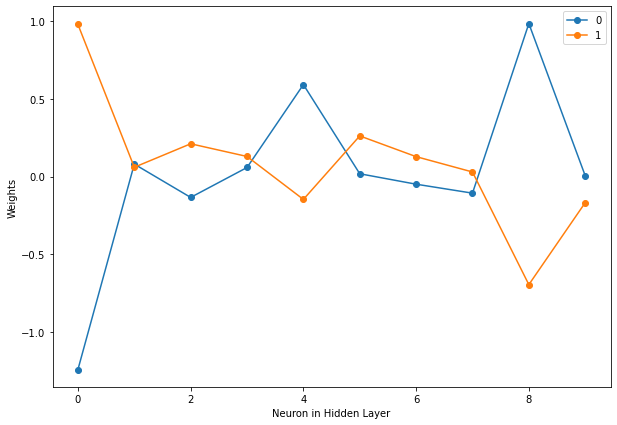

In [32]:
# 绘制出第二个全链接层的权重大小
# model[2]即提取第2层，网络一共4层
# 第0层为线性神经元，包括weight和bias，第1层为ReLU，
# 第2层为第二层神经原链接，包括weight和bias，第3层为logsoftmax
# 可以看出来权重是转置的，偏置是1维的
plt.figure(figsize = (10, 7))
print(model[0].weight.size())
print(model[0].bias.size())
# model[2].weight
for i in range(model[2].weight.size()[0]):
    #if i == 1:
        weights = model[2].weight[i].data.numpy()
        plt.plot(weights, 'o-', label = i)
plt.legend()
plt.xlabel('Neuron in Hidden Layer')
plt.ylabel('Weights')
plt.savefig("4-2.jpg")

torch.Size([10, 7135])


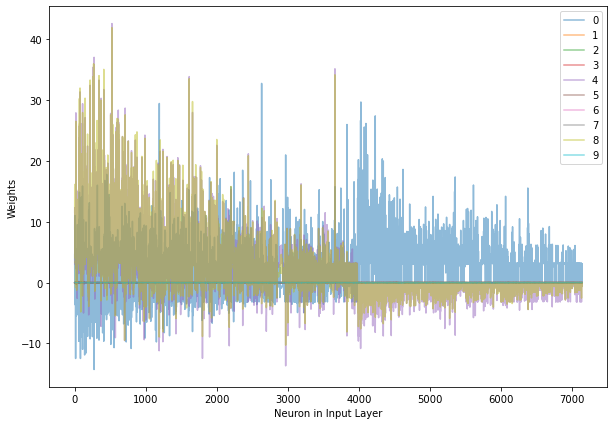

In [33]:
# 将第一层神经元的权重都打印出来，一条曲线表示一个隐含层神经元。横坐标为输入层神经元编号，纵坐标为权重值大小
plt.figure(figsize = (10, 7))
print(model[0].weight.size())
for i in range(model[0].weight.size()[0]):
    #if i == 1:
        weights = model[0].weight[i].data.numpy()
        plt.plot(weights, alpha = 0.5, label = i)
plt.legend()
plt.xlabel('Neuron in Input Layer')
plt.ylabel('Weights')
plt.savefig("4-3.jpg")

In [34]:
# 将第二层的各个神经元与输入层的链接权重，挑出来最大的权重和最小的权重，并考察每一个权重所对应的单词是什么，把单词打印出来
# model[0]是取出第一层的神经元

for i in range(len(model[0].weight)):
    print('\n')
    print('第{}个神经元'.format(i))
    print('max:')
    #i是序号，w是值
    st = sorted([(w,i) for i,w in enumerate(model[0].weight[i].data.numpy())])
    for i in range(1, 20):
#         st[][1]返回的是字典中的索引值
        word = index2word(st[-i][1],diction)
        print(word)
    print('min:')
    for i in range(20):
        word = index2word(st[i][1],diction)
        print(word)




第0个神经元
max:
严重
发错
一个月
丢
差劲
地摊货
找
不如
玩意
千万
差评
15
很差
差差
最差
一星
货才
要死
邮
min:
完全一致
不错
谢谢
力
广西南宁
惊喜
购
物超所值
还来
物有所值
很漂亮
老公
男朋友
试
超值
挺不错
号准
一家
划算
继续


第1个神经元
max:
解决方案
外表
七毛
冲着
热心
球
幸亏
一句
亏大
腹肌
脖子
那会事
效率
太错
哑巴
不作
35
价格
混浊
min:
不
小不说
花花绿绿
黑
童鞋
几
剩
就裂
缝好
公司
质量上乘
送个
兄弟姐妹
官方
糟糕
fashion
迅速
交给
破烂
鳄鱼


第2个神经元
max:
饭票
再也不会
水货
饿
单一
说太差
一模一样
不直
道理
事儿
迷惑
牙
欺骗
超值版
单穿
退回来
回回会
买点
野
min:
好
了
挺
的
下回
还来
多处
厚厚的
砸牌子
拖地板
看不到
弧度
太失
一包
物体
不长不短
中通
没想到
花钱买
普通


第3个神经元
max:
均匀
登山
奇慢
风范
满意度
不拉得
绝对
补给
东非
超值版
赞
店家
方面
并且
太沾毛
热心
一天
水里用
店祝
min:
了
还来
挺
的
好
下回
本来
乱搞
改过来
允许
小孩
漏
房东
穿蛮
亲戚
太往
不久
不带
错错
赤裸裸


第4个神经元
max:
YY
完全一致
耐心
nbsp
quot
包装
超值
划算
男朋友
试
掌柜的
亲身经历
我用
惊喜
总之
老朋友
上档次
不贵
棒
min:
差评
垃圾
不值
差劲
咋
月
很差
差
上当
烂
太差
一股
骗人
最差
找
难看
歪
痒
无语
丢


第5个神经元
max:
老公
面料
可以
还
不错
颜色
样式
污渍
一巴掌
好几家
底子
还货
扣
近
没得
激烈
帮助
细腻
超区
min:
也
好看
正
很
衣服
质量
实惠
合适
还是
了
声誉
非常
L
的
服务
调查
一点
处理
合格
价格


第6个神经元
max:
选择
改为
帮
码换
柜子
真帅
而来
de
过时
慎买
拿错
高端
拉基
不发
左鞋
衣衣
单件
差远了
取出
min:
也
物流
不贵
很棒
好
与
衣服
舒适感
非常
面料
超快
的
很
还
划算
店家
服务态度
都
饭否
111


第7个神经元
max:
满快
这以
问下查
折磨
潮流

In [45]:
# 收集到在测试集中判断错误的句子
# wrong_sentences存放判断出错的句子
wrong_sentences = []
# target存放判断出错的目标值
targets = []
j = 0
# 存放判断出错的下标
sent_indices = []
for data, target in zip(test_data, test_label):
    predictions = model(torch.tensor(data, dtype = torch.float).view(1,-1))
    pred = torch.max(predictions.data, 1)[1]
    target = torch.tensor(np.array([target]), dtype = torch.long).view_as(pred)
    rights = pred.eq(target)
#     print(rights,np.where(rights.numpy() == 0)[0])
#     如果判断出错，则incices不为空
#     print(np.where(rights.numpy() == 1),"\n")
#   如果np.where()满足条件则不为空，且存入元素0
#   如果np.where()不满足条件则为空，不存入元素
    indices = np.where(rights.numpy() == 0)[0]
#     print("\n")
# 
    for i in indices:
        wrong_sentences.append(data)
        targets.append(target[i])
        sent_indices.append(test_size + j + i)
    j += len(target) 

In [36]:
# 逐个查看出错的句子是什么
idx = 1

print(sentences[sent_indices[idx]], targets[idx].numpy())
lst = list(np.where(wrong_sentences[idx]>0)[0])
mm = list(map(lambda x:index2word(x, diction), lst))
print(mm)

['质量', '不错', '做工', '精细', '和', '描述', '的', '一样'] 1
['的', '不错', '质量', '和', '做工', '一样', '描述', '精细']
